In [32]:
import torch
import torch.nn as nn
import torchvision
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Load in image dataset
#torch.manual_seed(0) # Use for testing

minibatch_size = 5
transform = torchvision.transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True,transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=minibatch_size,shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=minibatch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


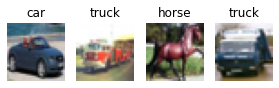

In [33]:
# Load in a minibatch
dataiter = iter(trainloader)
images, labels = dataiter.next()

plt.figure()
for i in range(minibatch_size-1):
    plt.subplot(1,minibatch_size,i+1)
    plt.axis('off')
    plt.imshow(np.transpose(images[i,:,:,:].detach().numpy(),(1,2,0)))
    plt.title(classes[labels[i]])

In [34]:
model = nn.Sequential(
          nn.Conv2d(3,10,5),
          nn.ReLU(),
          nn.Conv2d(10,20,5),
          nn.ReLU(),
          nn.Conv2d(20,30,5),
          nn.ReLU(),
          nn.Flatten(),
          nn.Linear(12000,100),
          nn.ReLU(),
          nn.Linear(100,10)
        )

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001,momentum=0.9)

In [35]:
epochs = 10

for ep in range(epochs):
    
    # Training loop
    epoch_loss = 0
    with tqdm(total=len(trainset), desc=f'Epoch {ep + 1}/{epochs}', unit='img') as pbar:
        for i,data in enumerate(trainloader,0):
            images,labels = data
            out = model.forward(images)
            loss = criterion(out,labels)
            pbar.set_postfix(**{'loss (batch)': loss.item()})

            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_value_(model.parameters(), 0.1)
            optimizer.step()

            pbar.update(images.shape[0])
        pbar.set_postfix(**{'average loss': epoch_loss/len(trainset)})

Epoch 1/10:  51%|█████     | 25435/50000 [13:00<12:33, 32.60img/s, loss (batch)=1.68] 


KeyboardInterrupt: 

50000